<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from lgca import get_lgca
from copy import deepcopy
from operator import itemgetter

In [2]:
# An example initial nodes 
L = 200
k = 3 #number of channels
init_nodes_filled = 10
init_channel_pop = 2
nodes = np.empty(L*k,dtype=object)
for i in range(init_nodes_filled*k):
    nodes[i] = [init_channel_pop*i+j+1 for j in range(init_channel_pop)]
for i in range((L-init_nodes_filled)*k):
    nodes[i+init_nodes_filled*k] = []
newnodes = nodes.reshape(L,k)
newnodes.shape
maxlabel = k*init_nodes_filled*init_channel_pop

In [7]:
#better to provide a maxlabel(which the max cell ID)

#lgca = get_lgca(geometry = '1d',dims=1000, ib=True, ve = True, ini_channel_pop = 2, capacity = 8, bc='reflecting', interaction = 'go_or_grow', kappa = 0.0, theta = 0.5)
#lgca.timeevo(timesteps = 200, recordnodespop = True, record=False)

lgca = get_lgca(geometry = '1d',dims=L, ib=True, ve = True, nodes=newnodes, maxlabel=maxlabel, ini_channel_pop = init_channel_pop, capacity = 4, bc='reflecting', interaction = 'go_or_grow', kappa = 0.0, theta = 0.5, r_b = 0.4)
lgca.timeevo(timesteps = 200, recordnodespop = True, record=True)

death rate set to r_d =  0.01
birth rate set to r_b =  0.4
Progress: [####################] 100% Done...


In [11]:
a = [2,3,4, 5]
a.extend([5])
a.remove(5)
a

[2, 3, 4, 5]

<IPython.core.display.Javascript object>


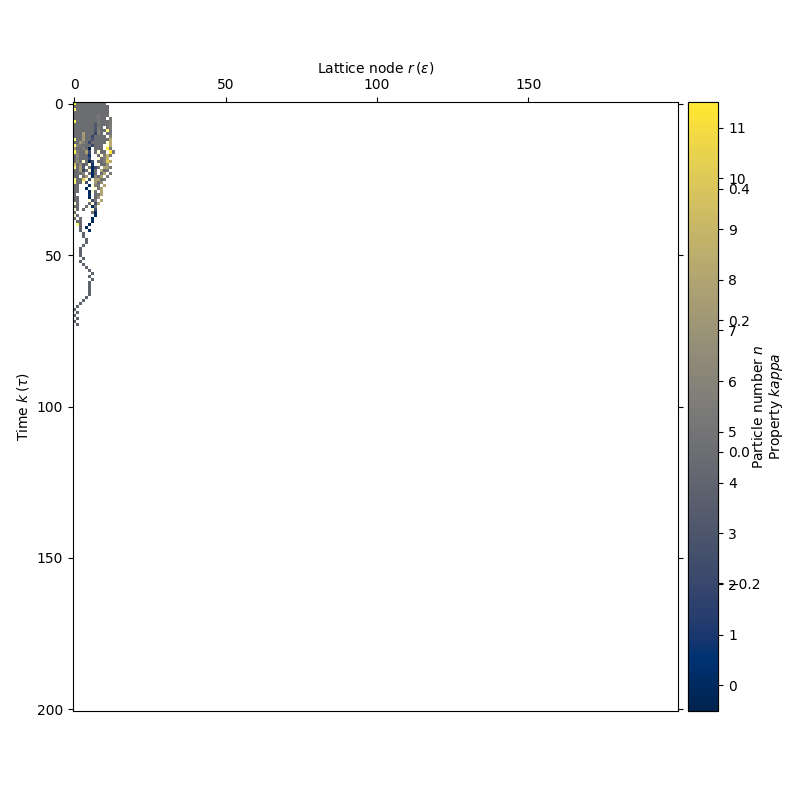

In [4]:
lgca.plot_nodes_population()

In [5]:
lgca.plot_prop_spatial(propname='kappa')


In [ ]:
k = lgca.props['kappa']
cells = [12, 3, 500]
print(itemgetter(*cells)(k))

In [9]:
propname = 'kappa'
mean_prop = np.ones(L)*-1
counter = 0
for node in lgca.nodes:
    cells = []
    for channel in node:
        cells.extend(channel)
    if cells != []:
        props = np.array(itemgetter(*cells)(lgca.props[propname]))
        mean_prop[counter]=props.mean()
    counter+=1
mean_prop
maskedmean = np.ma.masked_where(mean_prop==-1, mean_prop)
maskedmean

masked_array(data=[0.16186066123513415, -0.07610671909141284,
                   -0.02196335570808303, 0.0016822998975239516,
                   -0.12250207741943699, -0.09216071487796207,
                   -0.17555168802710358, -0.07592594749167632,
                   -0.1555944747592244, -0.22279455254045719,
                   -0.07760835953427431, 0.05260573185398203,
                   0.04065100088597319, -0.3332364624171421,
                   -0.31600908050355464, -0.19247008892967077,
                   -0.32781899407155796, -0.2480310386794537,
                   -0.2830215812077849, -0.2852039586473017,
                   -0.11878351168523785, -0.3111295422964083,
                   -0.11231580662382343, -0.20478212638876128,
                   -0.4540097593352171, -0.3828762160413192,
                   0.41857281146635944, -0.31027578581965853,
                   0.4553882629886079, 0.3352311899855904,
                   0.4373793848857505, 0.42271086227799826,
          

In [ ]:
lgca.nodespop_t

In [ ]:
lgca.nodes.shape

In [ ]:
lgca.props['kappa']

In [ ]:
lgca.props.items()
lengths = [len(value) for key, value in lgca.props.items()][0]
lengths

In [ ]:
lgca.nodes[3][0].append(3)

In [ ]:
#nodescopy = np.empty(lgca.l*lgca.K, dtype=object)
#for k in range(lgca.l*lgca.K):
#    nodescopy[k] = [0]
#nodescopy.reshape((lgca.l, lgca.K))
nodescopy = deepcopy(lgca.nodes)
nodescopy[:,2:]
#nodescopy[:, 2:] = lgca.nodes[:, 2:]
nodescopy[1:, 0] = lgca.nodes[:-1, 1]
nodescopy[:-1, 1] = lgca.nodes[1:, 0]
lgca.nodes = deepcopy(nodescopy)
nodescopy




In [ ]:
lgca.nodes_pop
lgca.capacity



In [6]:
def tanh_switch(rho, kappa=5., theta=0.8):
    return 0.5 * (1 + np.tanh(kappa * (rho - theta)))

In [7]:
for node in lgca.nodes:
    channel_counter = 1
    for channel in node:
        for cell in channel:
            if(np.random.random() < 0.1):
                channel.remove(cell) 
            if(cell in channel):
                if(np.random.random() < tanh_switch(rho=(len(channel)/lgca.capacity), kappa=0.5, theta=lgca.props['theta'][cell])):
                    #switch to rest
                    node[2].append(cell)
                    channel.remove(cell)
                else:
                    #switch to moving + reorientation 
                    node[np.random.randint(2)].append(cell)
                    channel.remove(cell)
        if(channel_counter%3 == 0):
            rho = len(channel)/lgca.capacity
            for cell in channel:
                if(np.random.random()<0.2*(1-rho)):
                    lgca.calc_max_label()
                    lgca.props['kappa'].append(np.random.normal(loc=lgca.props['kappa'][cell], scale = 0.2))
                    lgca.props['theta'].append(np.random.normal(loc=lgca.props['theta'][cell], scale = 0.2))
                    channel.append(lgca.maxlabel)
        channel_counter += 1
lgca.nodes

array([[list([170]), list([223]), list([105, 355])],
       [list([100, 431]), list([133, 354, 141]),
        list([47, 225, 373, 134, 252, 299, 69, 157, 172, 73])],
       [list([268, 432]), list([330]), list([169, 271, 116, 371, 145])],
       [list([343, 452]), list([269, 455]), list([388, 184])],
       [list([401, 276]), list([208, 471]), list([29, 148, 284, 433])],
       [list([327, 181]), list([206, 285]), list([326, 306, 484])],
       [list([9]), list([140, 315]), list([325, 51, 418, 16])],
       [list([380, 249]), list([87, 45]),
        list([489, 258, 267, 375, 70, 390, 442])],
       [list([247, 437]), list([406, 165, 413]), list([426, 222, 290])],
       [list([106, 468]), list([365, 427, 424]), list([50, 30, 66, 278])],
       [list([391]), list([114, 176, 138, 211]),
        list([419, 412, 408, 328, 274])],
       [list([349, 376, 458, 124]), list([428, 478]),
        list([395, 331, 319, 240, 121, 308])],
       [list([33, 393]), list([389, 333]),
        list([218,

In [25]:
for node in lgca.nodes:
    
    node_pop = 0
    for channel in node:
        for cell in channel:
            if(np.random.random() < 0.1):
                channel.remove(cell) 
        node_pop+=len(channel)
    rho = node_pop/lgca.capacity
    for channel in node:
        for cell in channel:
            if(np.random.random() < tanh_switch(rho=rho, kappa=lgca.props['kappa'][cell], theta=lgca.props['theta'][cell])):
                #switch to rest
                node[2].append(cell)
                channel.remove(cell)
            else:
                #switch to moving + reorientation 
                node[np.random.randint(2)].append(cell)
                channel.remove(cell)
    for cell in node[2]:
        if(np.random.random()<0.2*(1-rho)):
            lgca.calc_max_label()
            lgca.props['kappa'].append(np.random.normal(loc=lgca.props['kappa'][cell], scale = 0.2))
            lgca.props['theta'].append(np.random.normal(loc=lgca.props['theta'][cell], scale = 0.2))
            channel.append(lgca.maxlabel)
lgca.nodes

array([[list([170]), list([]), list([])],
       [list([]), list([299]), list([431])],
       [list([]), list([432]), list([])],
       [list([184]), list([]), list([269])],
       [list([208, 401, 29]), list([]), list([])],
       [list([]), list([285, 306]), list([181, 327])],
       [list([]), list([]), list([])],
       [list([375]), list([70, 390]), list([442])],
       [list([247]), list([]), list([426])],
       [list([]), list([30]), list([106])],
       [list([114, 499]), list([]), list([419])],
       [list([]), list([]), list([319, 331, 428])],
       [list([]), list([]), list([333])],
       [list([]), list([282, 301]), list([])],
       [list([367]), list([]), list([239])],
       [list([]), list([335]), list([])],
       [list([]), list([]), list([])],
       [list([]), list([]), list([])],
       [list([498]), list([359]), list([])],
       [list([345]), list([]), list([])],
       [list([]), list([]), list([])],
       [list([494]), list([493]), list([342])],
       [li

In [ ]:
lgca.props['theta']

In [ ]:
total_pop = sum(lgca.nodes_pop)
total_pop
dying = np.random.random(size = total_pop) < 0.2
dying

#reproducible = sum(lgca.channel_pop[:,2])
#reproducible
dying.astype(int)

In [ ]:
length_checker = np.vectorize(len)
length_checker(lgca.nodes)

In [ ]:
 def init_nodes(self, ini_channel_pop, nodes=None):
        #self.nodes = np.zeros((self.l + 2 * self.r_int, self.K), dtype=np.uint)
        if nodes is None:
            nodes = np.empty((self.l+2*self.r_int)*self.K, dtype=object)
            for k in range((self.l+2*self.r_int)*self.K):
                nodes[k] = [ini_channel_pop*k+i+1 for i in range(ini_channel_pop)]
            #for j in range(self.r_int*self.K):
            #    nodes[j] = []
            #    nodes[-j] = []
            self.nodes = nodes.reshape((self.l+2*self.r_int,self.K))
            self.maxlabel = (self.l+2*self.r_int)*self.K*ini_channel_pop
            print(self.maxlabel)
        else:
            #to be implemented
            occ = nodes > 0
            self.nodes[self.r_int:-self.r_int] = self.convert_bool_to_ib(occ)
            self.maxlabel = self.nodes.max()